In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

# Load Dataset

In [2]:
data = pd.read_csv('./bank.csv')
data.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

> <h2>Problem Statement:</h2> 

<h4 align='Right'>Predict if the client will subscribe (yes/no) to a term deposit, by building a classification model using Decision Tree.</h4>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
data.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

# Boxplot for 'age'

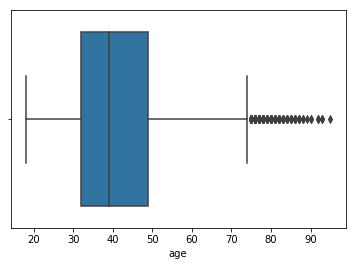

In [6]:
sns.boxplot(x=data["age"])
plt.show()

In [7]:
bank = data.copy()

In [8]:
bank['deposit']

0        yes
1        yes
2        yes
3        yes
4        yes
5        yes
6        yes
7        yes
8        yes
9        yes
10       yes
11       yes
12       yes
13       yes
14       yes
15       yes
16       yes
17       yes
18       yes
19       yes
20       yes
21       yes
22       yes
23       yes
24       yes
25       yes
26       yes
27       yes
28       yes
29       yes
        ... 
11132     no
11133     no
11134     no
11135     no
11136     no
11137     no
11138     no
11139     no
11140     no
11141     no
11142     no
11143     no
11144     no
11145     no
11146     no
11147     no
11148     no
11149     no
11150     no
11151     no
11152     no
11153     no
11154     no
11155     no
11156     no
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 11162, dtype: object

In [9]:
# People who made a deposit vs Job Category
jobs = list(data['job'].unique())

for j in jobs:
    print("{} : {}".format(j,len(bank[(bank.deposit=="yes")&(bank.job==j)])))

admin. : 631
technician : 840
services : 369
management : 1301
retired : 516
blue-collar : 708
unemployed : 202
entrepreneur : 123
housemaid : 109
unknown : 34
self-employed : 187
student : 269


In [10]:
bank.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [11]:
# Combining similar jobs into categories
bank['job'] = bank['job'].replace(['management','admin.'],'white-collar')
bank['job'] = bank['job'].replace(['services','housemaid'],'pink-collar')
bank['job'] = bank['job'].replace(['retired','student','unemployed','unknown'],'other')

In [12]:
bank.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [13]:
bank.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [14]:
bank['poutcome'] = bank['poutcome'].replace(['other'],'unknown')
bank.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [15]:
# Contact can be removed as all are contacted and it is not going to effect the data
bank.drop('contact',axis=1,inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
bank['housing_le'] = le.fit_transform(bank['housing'])

In [18]:
bank['loan_le'] = le.fit_transform(bank['loan'])

In [19]:
bank['loan_le'].unique()

array([0, 1], dtype=int64)

In [20]:
bank['default_le'] = le.fit_transform(bank['default'])

In [21]:
# Pdays: Number of days that passed by after the client was last contacted from a previous campaign
# - 1 represents not contacted

print("Customers that have not contacted before:",len(bank[bank.pdays==-1]))
print("Maximum values on pdays :", bank['pdays'].max())

Customers that have not contacted before: 8324
Maximum values on pdays : 854


In [22]:
# Changing -1 to 10000 to indicate it is so far in the past that it has no effect
bank.loc[bank['pdays']==-1,'pdays'] = 10000

In [23]:
bank['recent_pdays'] = np.where(bank['pdays'],1/bank.pdays,1/bank.pdays)

In [24]:
bank['recent_pdays']

0        0.000100
1        0.000100
2        0.000100
3        0.000100
4        0.000100
5        0.000100
6        0.000100
7        0.000100
8        0.000100
9        0.000100
10       0.000100
11       0.000100
12       0.000100
13       0.000100
14       0.000100
15       0.000100
16       0.000100
17       0.000100
18       0.000100
19       0.000100
20       0.000100
21       0.000100
22       0.000100
23       0.000100
24       0.000100
25       0.000100
26       0.000100
27       0.000100
28       0.000100
29       0.000100
           ...   
11132    0.000100
11133    0.003846
11134    0.000100
11135    0.000100
11136    0.000100
11137    0.000100
11138    0.000100
11139    0.000100
11140    0.000100
11141    0.000100
11142    0.000100
11143    0.000100
11144    0.000100
11145    0.003690
11146    0.000100
11147    0.000100
11148    0.000100
11149    0.000100
11150    0.000100
11151    0.000100
11152    0.000100
11153    0.000100
11154    0.000100
11155    0.005814
11156    0

In [25]:
# We dont require last contact day and month as they are already contacted and it is not going to effect any data
bank.drop(columns=['month','day','pdays'],axis=1,inplace=True)

In [26]:
bank['deposit_le'] = le.fit_transform(bank['deposit'])

In [27]:
data.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [28]:
# Remove the columns which are transformed
bank.drop(columns=['housing','loan','deposit','default'],axis=1,inplace=True)

In [29]:
bank.head()

age           job  marital  education  balance  duration  campaign  \
0   59  white-collar  married  secondary     2343      1042         1   
1   56  white-collar  married  secondary       45      1467         1   
2   41    technician  married  secondary     1270      1389         1   
3   55   pink-collar  married  secondary     2476       579         1   
4   54  white-collar  married   tertiary      184       673         2   

   previous poutcome  housing_le  loan_le  default_le  recent_pdays  \
0         0  unknown           1        0           0        0.0001   
1         0  unknown           0        0           0        0.0001   
2         0  unknown           1        0           0        0.0001   
3         0  unknown           1        0           0        0.0001   
4         0  unknown           0        0           0        0.0001   

   deposit_le  
0           1  
1           1  
2           1  
3           1  
4           1

In [30]:
# Creating dummy variables for job,marital,education, poutcome
job_dummy = pd.get_dummies(bank['job'],drop_first=True)
job_dummy.head()

entrepreneur  other  pink-collar  self-employed  technician  white-collar
0             0      0            0              0           0             1
1             0      0            0              0           0             1
2             0      0            0              0           1             0
3             0      0            1              0           0             0
4             0      0            0              0           0             1

In [31]:
marital_dummy = pd.get_dummies(bank['marital'],drop_first=True)
marital_dummy.head()

married  single
0        1       0
1        1       0
2        1       0
3        1       0
4        1       0

In [32]:
edu_dummy = pd.get_dummies(bank['education'],drop_first=True)
edu_dummy.head()

secondary  tertiary  unknown
0          1         0        0
1          1         0        0
2          1         0        0
3          1         0        0
4          0         1        0

In [33]:
poutcome_dummy = pd.get_dummies(bank['poutcome'],drop_first=True)
poutcome_dummy.head()

success  unknown
0        0        1
1        0        1
2        0        1
3        0        1
4        0        1

In [34]:
poutcome_dummy['unknown_outcome'] = poutcome_dummy['unknown']

In [35]:
poutcome_dummy.drop(columns='unknown',axis=1,inplace=True)

In [36]:
poutcome_dummy.head()

success  unknown_outcome
0        0                1
1        0                1
2        0                1
3        0                1
4        0                1

In [37]:
bank_wrangled = pd.concat([bank,job_dummy,marital_dummy,edu_dummy,poutcome_dummy],axis=1)
bank_wrangled.head()

age           job  marital  education  balance  duration  campaign  \
0   59  white-collar  married  secondary     2343      1042         1   
1   56  white-collar  married  secondary       45      1467         1   
2   41    technician  married  secondary     1270      1389         1   
3   55   pink-collar  married  secondary     2476       579         1   
4   54  white-collar  married   tertiary      184       673         2   

   previous poutcome  housing_le       ...         self-employed  technician  \
0         0  unknown           1       ...                     0           0   
1         0  unknown           0       ...                     0           0   
2         0  unknown           1       ...                     0           1   
3         0  unknown           1       ...                     0           0   
4         0  unknown           0       ...                     0           0   

   white-collar  married  single  secondary  tertiary  unknown  success  \
0             1        1       0          1         0        0        0   
1             1        1       0          1         0        0        0   
2             0        1       0          1         0        0        0   
3             0        1       0          1         0        0        0   
4             1        1       0          0         1        0        0   

   unknown_outcome  
0                1  
1                1  
2                1  
3                1  
4                1  

[5 rows x 27 columns]

In [38]:
bank_wrangled.drop(columns=['job','marital','education','poutcome'],axis=1,inplace=True)

In [39]:
bank_wrangled.head()

age  balance  duration  campaign  previous  housing_le  loan_le  \
0   59     2343      1042         1         0           1        0   
1   56       45      1467         1         0           0        0   
2   41     1270      1389         1         0           1        0   
3   55     2476       579         1         0           1        0   
4   54      184       673         2         0           0        0   

   default_le  recent_pdays  deposit_le       ...         self-employed  \
0           0        0.0001           1       ...                     0   
1           0        0.0001           1       ...                     0   
2           0        0.0001           1       ...                     0   
3           0        0.0001           1       ...                     0   
4           0        0.0001           1       ...                     0   

   technician  white-collar  married  single  secondary  tertiary  unknown  \
0           0             1        1       0          1         0        0   
1           0             1        1       0          1         0        0   
2           1             0        1       0          1         0        0   
3           0             0        1       0          1         0        0   
4           0             1        1       0          0         1        0   

   success  unknown_outcome  
0        0                1  
1        0                1  
2        0                1  
3        0                1  
4        0                1  

[5 rows x 23 columns]

In [40]:
bank_wrangled.keys()

Index(['age', 'balance', 'duration', 'campaign', 'previous', 'housing_le',
       'loan_le', 'default_le', 'recent_pdays', 'deposit_le', 'entrepreneur',
       'other', 'pink-collar', 'self-employed', 'technician', 'white-collar',
       'married', 'single', 'secondary', 'tertiary', 'unknown', 'success',
       'unknown_outcome'],
      dtype='object')

In [41]:
len(bank_wrangled[(bank_wrangled.deposit_le==1) & (bank_wrangled.loan_le) &(bank_wrangled.housing_le)])

265

In [42]:
len(bank[(bank_wrangled.deposit_le==1) & (bank_wrangled.default_le==1)])

52

C:\Users\avinash\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


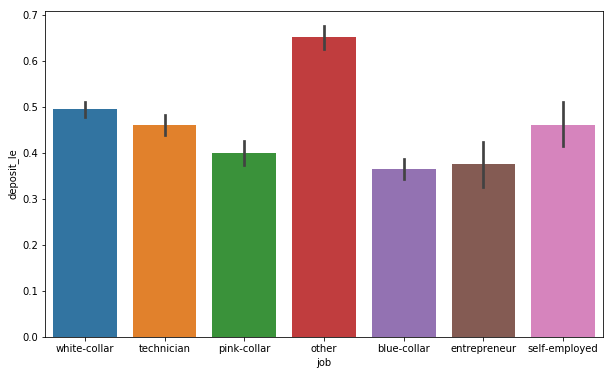

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x='job',y='deposit_le',data=bank)
plt.show()

# Correlation

In [44]:
df = bank_wrangled

In [45]:
corr = df.corr()
corr

age   balance  duration  campaign  previous  housing_le  \
age              1.000000  0.112300  0.000189 -0.005278  0.020169   -0.168700   
balance          0.112300  1.000000  0.022436 -0.013894  0.030805   -0.077092   
duration         0.000189  0.022436  1.000000 -0.041557 -0.026716    0.035051   
campaign        -0.005278 -0.013894 -0.041557  1.000000 -0.049699    0.006660   
previous         0.020169  0.030805 -0.026716 -0.049699  1.000000   -0.000840   
housing_le      -0.168700 -0.077092  0.035051  0.006660 -0.000840    1.000000   
loan_le         -0.031418 -0.084589 -0.001914  0.034722 -0.022668    0.076761   
default_le      -0.011425 -0.060954 -0.009760  0.030975 -0.035273    0.011076   
recent_pdays     0.019102 -0.004379 -0.014868 -0.026296  0.122076   -0.029350   
deposit_le       0.034901  0.081129  0.451919 -0.128081  0.139867   -0.203888   
entrepreneur     0.024176  0.005039 -0.000908  0.013883 -0.022470    0.011492   
other            0.296418  0.050744  0.010680 -0.050212  0.031191   -0.233309   
pink-collar     -0.027942 -0.041063  0.005345  0.011958 -0.028623    0.043884   
self-employed   -0.023163  0.020264  0.013506  0.001776 -0.002338   -0.016903   
technician      -0.082716  0.003802 -0.010440  0.021738  0.002035    0.006551   
white-collar    -0.080122  0.013780 -0.031980  0.001944  0.034929   -0.012111   
married          0.318436  0.025431 -0.036179  0.047722 -0.005176    0.036305   
single          -0.467799 -0.014994  0.023847 -0.046165  0.023817   -0.043817   
secondary       -0.094400 -0.070609  0.003820 -0.013834 -0.004620    0.118514   
tertiary        -0.101372  0.069128 -0.006813 -0.005427  0.028146   -0.114955   
unknown          0.077761  0.014596 -0.015887  0.012976 -0.011898   -0.053191   
success          0.062114  0.045603 -0.022578 -0.091807  0.325477   -0.136299   
unknown_outcome -0.038992 -0.034524  0.042725  0.128907 -0.496921    0.031375   

                  loan_le  default_le  recent_pdays  deposit_le  \
age             -0.031418   -0.011425      0.019102    0.034901   
balance         -0.084589   -0.060954     -0.004379    0.081129   
duration        -0.001914   -0.009760     -0.014868    0.451919   
campaign         0.034722    0.030975     -0.026296   -0.128081   
previous        -0.022668   -0.035273      0.122076    0.139867   
housing_le       0.076761    0.011076     -0.029350   -0.203888   
loan_le          1.000000    0.076434     -0.012697   -0.110580   
default_le       0.076434    1.000000     -0.011290   -0.040680   
recent_pdays    -0.012697   -0.011290      1.000000    0.034457   
deposit_le      -0.110580   -0.040680      0.034457    1.000000   
entrepreneur     0.042631    0.022060      0.006251   -0.034443   
other           -0.096196   -0.018130      0.024356    0.144408   
pink-collar      0.014969   -0.007173     -0.001183   -0.051717   
self-employed    0.004299    0.007493     -0.008226   -0.004707   
technician       0.006864    0.003109     -0.007412   -0.011557   
white-collar    -0.007871   -0.013425      0.004516    0.031621   
married          0.044148   -0.006819      0.009583   -0.092157   
single          -0.065288   -0.006255      0.003736    0.094632   
secondary        0.079583   -0.000618     -0.017129   -0.051952   
tertiary        -0.067513   -0.011768      0.017346    0.094598   
unknown         -0.050249    0.005421      0.013590    0.014355   
success         -0.080370   -0.040272      0.119598    0.286642   
unknown_outcome  0.053686    0.048403     -0.126890   -0.224785   

                      ...         self-employed  technician  white-collar  \
age                   ...             -0.023163   -0.082716     -0.080122   
balance               ...              0.020264    0.003802      0.013780   
duration              ...              0.013506   -0.010440     -0.031980   
campaign              ...              0.001776    0.021738      0.001944   
previous              ...             -0.002338    0.002035      0.034929   
housin

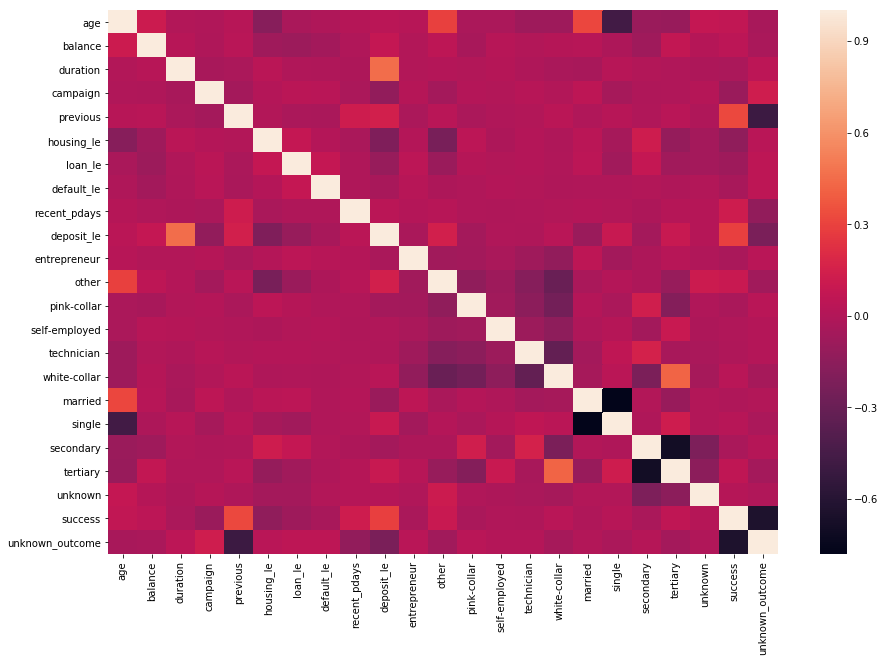

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(corr)

# Model

In [47]:
X = df.drop(columns='deposit_le')
Y = df['deposit_le']

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [49]:
dt2 = tree.DecisionTreeClassifier(max_depth=2)
dt2.fit(X_train,Y_train)
dt2_score_train = dt2.score(X_train,Y_train)
print("Training Score = {}".format(dt2_score_train))
dt2_score_test = dt2.score(X_test,Y_test)
print("Test Score = {}".format(dt2_score_test))

Training Score = 0.7278530630529735
Test Score = 0.729511867442902


In [50]:
# Decision Tree with depth 3
dt3 = tree.DecisionTreeClassifier(max_depth=3)
dt3.fit(X_train,Y_train)
dt3_score_train = dt3.score(X_train,Y_train)
print("Training Score = {}".format(dt3_score_train))
dt3_score_test = dt3.score(X_test,Y_test)
print("Test Score = {}".format(dt3_score_test))

Training Score = 0.7802665472057341
Test Score = 0.7693685624720108


In [51]:
# Decision Tree with depth 4
dt4 = tree.DecisionTreeClassifier(max_depth=4)
dt4.fit(X_train,Y_train)
dt4_score_train = dt4.score(X_train,Y_train)
print("Training Score = {}".format(dt4_score_train))
dt4_score_test = dt4.score(X_test,Y_test)
print("Test Score = {}".format(dt4_score_test))

Training Score = 0.789450106394893
Test Score = 0.780564263322884


In [52]:
# Decision Tree with depth 6
dt6 = tree.DecisionTreeClassifier(max_depth=6)
dt6.fit(X_train,Y_train)
dt6_score_train = dt6.score(X_train,Y_train)
print("Training Score = {}".format(dt6_score_train))
dt6_score_test = dt6.score(X_test,Y_test)
print("Test Score = {}".format(dt6_score_test))

Training Score = 0.8030014559301154
Test Score = 0.793999104343932


In [53]:
# Decision Tree with full depth
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_score_train = dt.score(X_train,Y_train)
print("Training Score = {}".format(dt_score_train))
dt_score_test = dt.score(X_test,Y_test)
print("Test Score = {}".format(dt_score_test))

Training Score = 1.0
Test Score = 0.7339901477832512


In [54]:
print('{}\t\t{}\t\t\t{}'.format('depth','Training Score','Testing Score'))
print('{}\t\t{}\t\t\t{}'.format('-----','--------------','-------------'))
print('{}\t\t{}\t\t{}'.format(2,dt2_score_train,dt2_score_test))
print('{}\t\t{}\t\t{}'.format(3,dt3_score_train,dt3_score_test))
print('{}\t\t{}\t\t{}'.format(4,dt4_score_train,dt4_score_test))
print('{}\t\t{}\t\t{}'.format(6,dt6_score_train,dt6_score_test))
print('{}\t\t{}\t\t\t\t{}'.format('max',dt_score_train,dt_score_test))

depth		Training Score			Testing Score
-----		--------------			-------------
2		0.7278530630529735		0.729511867442902
3		0.7802665472057341		0.7693685624720108
4		0.789450106394893		0.780564263322884
6		0.8030014559301154		0.793999104343932
max		1.0				0.7339901477832512


In [55]:
import graphviz

In [56]:
features = list(X.keys())

In [57]:
dot_data = tree.export_graphviz(dt,
                                out_file=None,
                                feature_names=features,
                                filled=True, 
                                class_names=['0','1'],
                                rounded=True, 
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [59]:
graph.render('Decision Tree')

'Decision Tree.pdf'